In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('jamb_exam_results.csv')

In [3]:
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
del df['student_id']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [16]:
df.parent_education_level.fillna(value=0, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [20]:
df_train.shape, df_val.shape, df_test.shape

((3000, 16), (1000, 16), (1000, 16))

In [36]:
y_train = df_train.jamb_score
y_test = df_test.jamb_score
y_val = df_val.jamb_score

In [39]:
del df_train['jamb_score']
del df_test['jamb_score']
del df_val['jamb_score']

In [41]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)

In [42]:
X_train = pd.get_dummies(df_train)
X_val = pd.get_dummies(df_val)
X_test = pd.get_dummies(df_test)

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

dt = DecisionTreeRegressor(max_depth = 1)

In [45]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

#### Question 1

In [50]:
print(export_text(dt, feature_names=list(X_train.columns)))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



#### Question 2

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state=1, n_jobs = -1)

In [53]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [54]:
from sklearn.metrics import mean_squared_error

In [56]:
y_pred = rf.predict(X_val)

In [59]:
mean_squared_error(y_val, y_pred, squared = False)

41.91484140492482

In [73]:
scores = []

for i in range(10,201,10):

    #instantiate the model with variable n_estimators
    rf = RandomForestRegressor(n_estimators = i, random_state=1, n_jobs = -1)

    #fitting the model
    rf.fit(X_train, y_train)

    #predictions on validation set
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared = False)

    scores.append((i, rmse))

In [78]:
results = pd.DataFrame(scores, columns=['n_estimators','rmse'])
results

,n_estimators,rmse
0,10,41.914841
1,20,41.072758
2,30,40.735044
3,40,40.644442
4,50,40.539066
5,60,40.500045
6,70,40.466840
7,80,40.360362
8,90,40.353314
9,100,40.378008


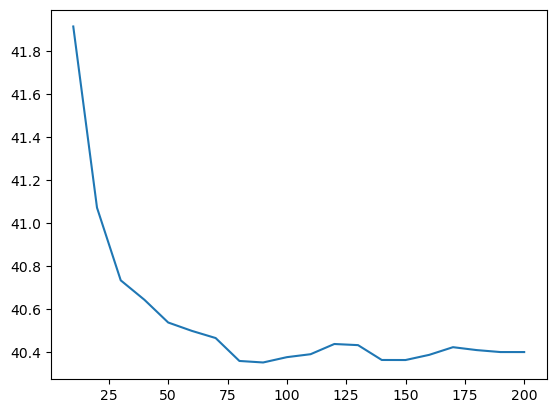

In [79]:
plt.plot(results.n_estimators, results.rmse)

#### question 4 - best max_depth

In [81]:
scores = []
max_depth = [10, 15, 20, 25]

for i in max_depth:
    for n in range(10,201,10):
        #instantiate the model with variable n_estimators
        rf = RandomForestRegressor(n_estimators = n, 
                                   max_depth=i,
                                   random_state=1, n_jobs = -1)
    
        #fitting the model
        rf.fit(X_train, y_train)
    
        #predictions on validation set
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared = False)
    
        scores.append((i,n, rmse))

In [83]:
results_v2 = pd.DataFrame(scores, 
             columns = ['max_depth','n_estimators','rmse'])

results_v2

,max_depth,n_estimators,rmse
0,10,10,41.086079
1,10,20,40.838638
2,10,30,40.649951
3,10,40,40.391795
4,10,50,40.367407
...,...,...,...
75,25,160,40.392469
76,25,170,40.431708
77,25,180,40.417925
78,25,190,40.406576


In [88]:
results_v3 = results_v2.groupby('max_depth').agg({'rmse':'mean'})
results_v3.sort_values('rmse', ascending=True)

,rmse
max_depth,
10,40.349069
15,40.532942
25,40.546033
20,40.660359


#### question 5

In [90]:
rf_new = RandomForestRegressor(n_estimators = 10,
                          max_depth = 20,
                          random_state = 1,
                          n_jobs = -1)

In [91]:
rf_new.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [98]:
importances = rf_new.feature_importances_

In [99]:
pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances}).sort_values(by='Importance', ascending=False)

,Feature,Importance
0,study_hours_per_week,0.247202
1,attendance_rate,0.148958
3,distance_to_school,0.134744
2,teacher_quality,0.082369
4,age,0.070645
5,assignments_completed,0.030181
22,socioeconomic_status_High,0.025557
14,parent_involvement_High,0.022381
17,it_knowledge_High,0.017682
27,parent_education_level_Secondary,0.015777


#### q6

In [101]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [105]:
import xgboost as xgb

In [106]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=X_val.columns)

In [107]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [117]:
y_pred = model.predict(dval)
rmse_base = mean_squared_error(y_pred, y_val, squared = False)
rmse_base

43.86812993377497

In [119]:
#retraining with eta = 0.1

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = model.predict(dval)
rmse_new = mean_squared_error(y_pred, y_val, squared = False)
rmse_new

40.97211053219794